In [58]:
import numpy as np
import pandas as pd
import molecCollPackage as molec
import os.path
import sys
import glob
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib.backends.backend_pdf import PdfPages

In [59]:
def readCSVPandas(folder_name):
    owd = os.getcwd()
    path = os.path.join(owd, folder_name)
    extension = 'csv'
    os.chdir(path)
    csv_files = [i for i in glob.glob('*.{}'.format(extension))]

    df = pd.read_csv(csv_files[0])
    for file in csv_files[1:]:
        df = df.append(pd.read_csv(file))

    df = df.reset_index(drop=True)
    os.chdir(owd)

    return df

In [60]:
atom = "Li"
folder_name = ("data_"+ atom)

data_Li =readCSVPandas(folder_name)

In [95]:
# Pick Temperatures to plot
T_range = np.array([2000, 800, 700, 675, 500, 475, 400, 350, 275, 180, 125, 100, 75, 50, 40, 25])

frac_pd = pd.DataFrame(columns=['frac_unstable_mean', 'frac_unstable_std', 'T', 'delta'])
for T in T_range:
    # Only select the specific temperature trajectories
    data_pd_temp = (data_Li.loc[data_Li['T'] == T])[['unstable', 'T', 'delta']]
    # Loop over delta values and for each do some statistics
    delta_range = np.logspace(-12, -1, 8)
    delta_range = np.delete(delta_range, 6) # no good reason for doing this, yet
    for i in range(len(delta_range)):
        frac_pd = frac_pd.append(pd.DataFrame([[0, 0, T, delta_range[i]]], columns=list(frac_pd)), ignore_index=True)
        temp_pd = data_pd_temp.loc[data_pd_temp['delta']==delta_range[i]]
        frac_pd.loc[(frac_pd["delta"]==delta_range[i]) & (frac_pd["T"] == T), "frac_unstable_mean"] = temp_pd["unstable"].mean()
        frac_pd.loc[(frac_pd["delta"]==delta_range[i]) & (frac_pd["T"] == T), "frac_unstable_std"] = temp_pd["unstable"].std()



In [96]:
#frac_pd

C:\Users\AndreiHoria\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


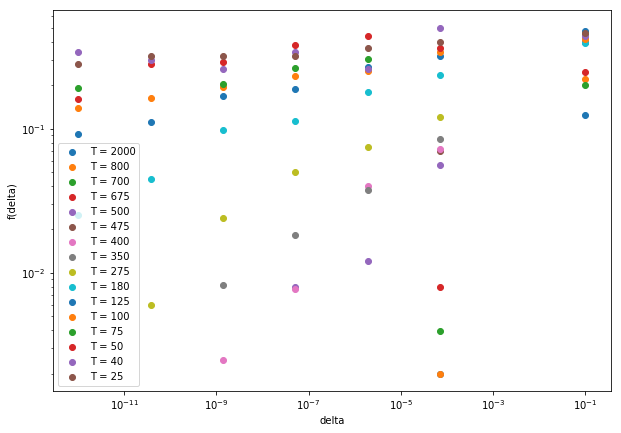

In [97]:
fig, ax = plt.subplots(1, 1)
plot_T = T_range
for T in plot_T:
    frac_pd.loc[frac_pd['T'] == T].plot(x='delta', y='frac_unstable_mean', \
                  figsize = (10,7), logy=True, logx=True, marker = 'o', linestyle='None', ax = ax, label=("T = %s" %(T)))

plt.ylabel("f(delta)")
plt.legend()
plt.show()
    


In [98]:
frac_pd

,frac_unstable_mean,frac_unstable_std,T,delta
0,0.00000,0.000000,2000,1.000000e-12
1,0.00000,0.000000,2000,3.727594e-11
2,0.00000,0.000000,2000,1.389495e-09
3,0.00000,0.000000,2000,5.179475e-08
4,0.00000,0.000000,2000,1.930698e-06
5,0.00200,0.063246,2000,7.196857e-05
6,0.12400,0.482552,2000,1.000000e-01
7,0.00000,0.000000,800,1.000000e-12
8,0.00000,0.000000,800,3.727594e-11
9,0.00000,0.000000,800,1.389495e-09


In [99]:
# x = df_stability[['delta']]
# pd.DataFrame(np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(df_stability.fillna(0)),
#              ['Slope'], df_stability.columns)

fitfunc = lambda p, x: p[1]*np.power(x,(p[0])) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [0.15, 0.5] # Initial guess for the parameters

def fitdata(data_x, data_y):
    p1, success=sp.optimize.leastsq(errfunc,  p0[:], args=(data_x,data_y), xtol = 0.000001)
    to_return = np.append(p1, success)
    return to_return

fractal_dim = pd.DataFrame()
fractal_dim['Temp'] = T_range
frac_dim_list = np.zeros(fractal_dim.shape[0])
fit_param_1 = np.zeros(fractal_dim.shape[0])
fit_param_2 = np.zeros(fractal_dim.shape[0])
i = 0;
for temp in fractal_dim['Temp']:
    fit_1, fit_2, fit_err = fitdata(frac_pd.loc[frac_pd["T"]==temp]["delta"], frac_pd.loc[frac_pd["T"]==temp]["frac_unstable_mean"])
    frac_dim_list[i] = 1-(fit_1)
    fit_param_1[i] = fit_1
    fit_param_2[i] = fit_2
    i += 1
fractal_dim["Fractal_dim"] = pd.Series(frac_dim_list) 
fractal_dim["fit_param_1"] = pd.Series(fit_param_1) # We can always get the fit param_1 fro the fractal dimension, but this makes it easier toa ccess
fractal_dim["fit_param_2"] = pd.Series(fit_param_2) 


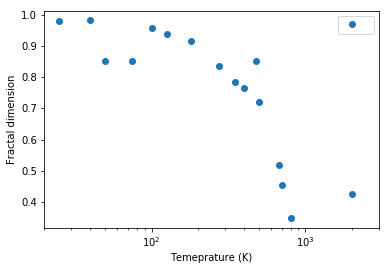

In [101]:
fractal_dim.plot(x='Temp', y='Fractal_dim', style='o', linestyle = 'None', \
                 xlim=[3000,20], logx=True, logy=False, label="")
#plt.ylim([0, 1])
plt.gca().invert_xaxis()
plt.ylabel("Fractal dimension")
plt.xlabel("Temeprature (K)")
# plt.ylim([0, 1.1])
plt.show()

# Making the actual plots

In [26]:
fractal_dim

,Temp,Fractal_dim,fit_param_1,fit_param_2
0,2000,0.426399,0.573601,0.464541
1,800,0.348597,0.651403,0.985884
2,700,0.454011,0.545989,0.703105
3,675,0.520045,0.479955,0.742843
4,475,0.850000,0.150000,0.500000
5,400,0.763929,0.236071,0.710348
6,350,0.790792,0.209208,0.643938
7,275,0.834902,0.165098,0.618703
8,50,0.850000,0.150000,0.500000
9,40,0.850000,0.150000,0.500000


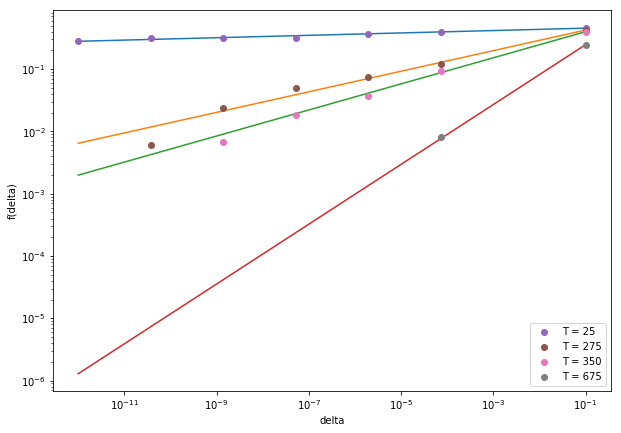

In [29]:
plot_T = np.array([25, 275, 350, 675])
fig, ax = plt.subplots(1, 1)
fractal_dim
N = 100
delta_x = np.logspace(-12,-1, N)
frac_y = np.zeros(N)
for T in plot_T:
    for i in range(N):
        frac_y[i] = (fractal_dim.loc[fractal_dim["Temp"]==T]["fit_param_2"])*delta_x[i]**(fractal_dim.loc[fractal_dim["Temp"]==T]["fit_param_1"])
    plt.plot(delta_x, frac_y)


for T in plot_T:
    frac_pd.loc[frac_pd['T'] == T].plot(x='delta', y='frac_unstable_mean', \
                  figsize = (10,7), logy=True, logx=True, marker = 'o', linestyle='None', ax = ax, label=("T = %s" %(T)))

plt.ylabel("f(delta)")
plt.legend()
plt.show()
pp = PdfPages('uncertainty.pdf')
pp.savefig(fig)
pp.close()

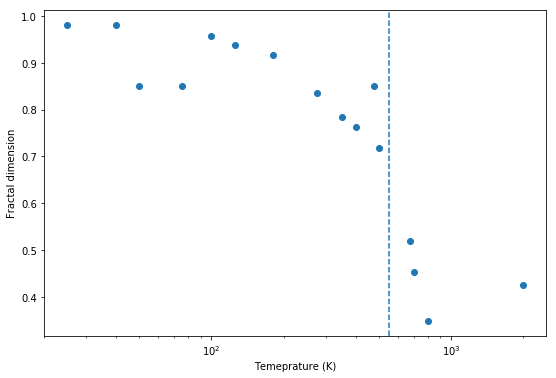

In [103]:
fig, ax = plt.subplots(1, 1)
plt.axvline(x=550, linestyle='--')
fractal_dim.plot(x='Temp', y='Fractal_dim', style='o', linestyle = 'None', \
                 xlim=[2500,20], logx=True, logy=False, label="", ax=ax, figsize=(9, 6))
#plt.ylim([0, 1])
ax.legend_.remove()
plt.gca().invert_xaxis()
plt.ylabel("Fractal dimension")
plt.xlabel("Temeprature (K)")
# plt.ylim([0.2,1.1])
plt.show()
pp = PdfPages('fractal_dim.pdf')
pp.savefig(fig)
pp.close()